In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [26]:
train= pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

VISUALIZATION

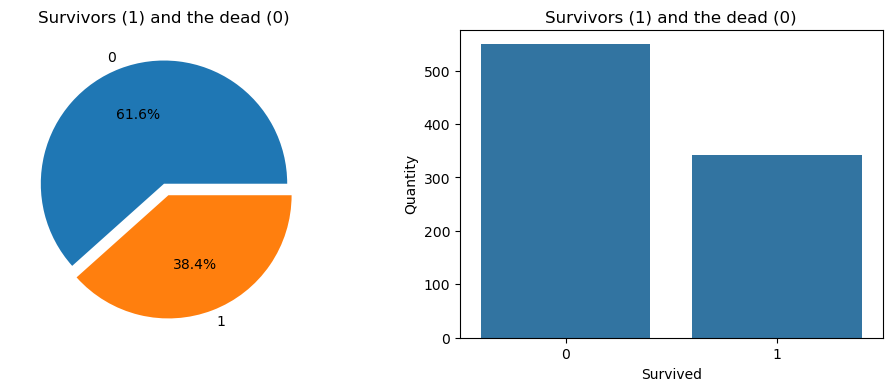

In [27]:
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 

train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False) 
ax[0].set_title('Survivors (1) and the dead (0)') 
ax[0].set_ylabel('') 
sns.countplot(x='Survived', data=train, ax=ax[1])
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survivors (1) and the dead (0)') 
plt.show()

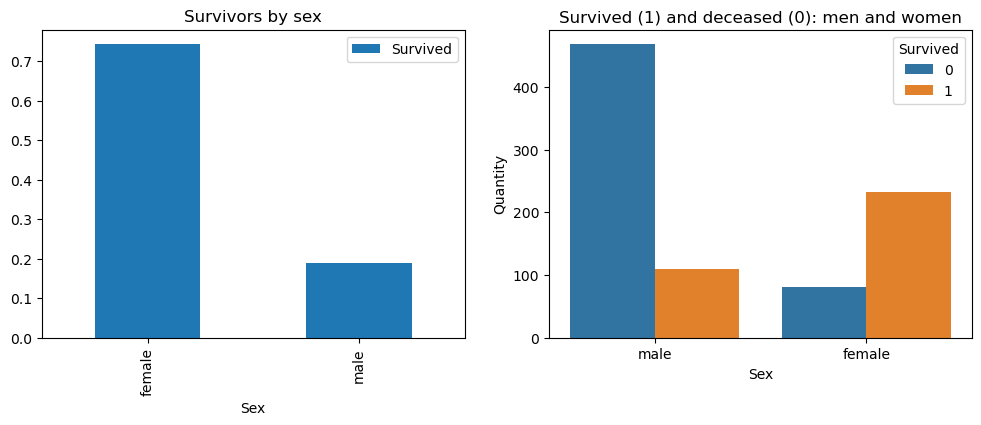

In [87]:
# SEX FEATURE
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0]) 
ax[0].set_title('Survivors by sex') 
sns.countplot(x='Sex', hue='Survived', data=train, ax=ax[1])
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survived (1) and deceased (0): men and women') 
plt.show()

EXPLORATORY DATA ANALYSIS

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
df_num = train[["Age", "SibSp", "Parch", "Fare"]]
df_cat = train[["Survived", "Sex", "Cabin", "Embarked", "Ticket"]]

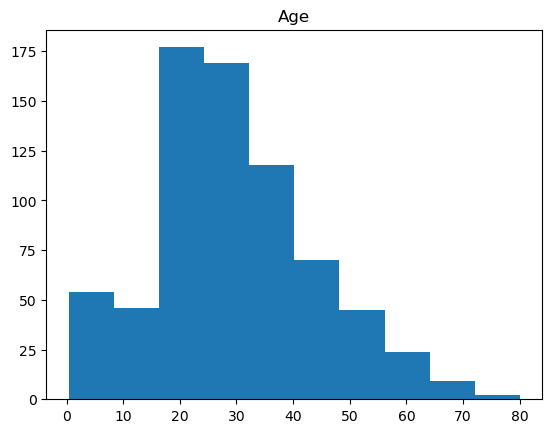

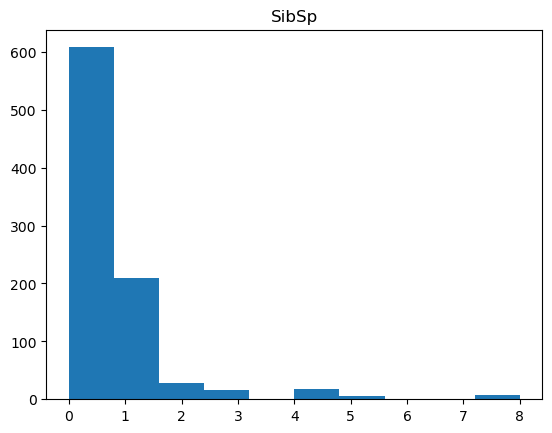

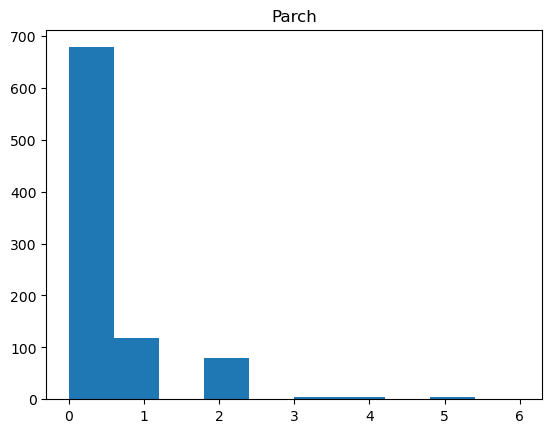

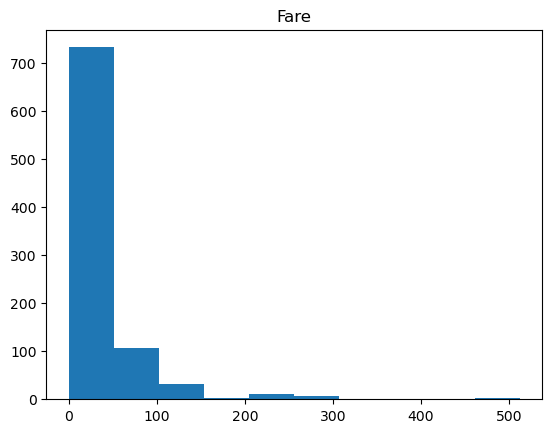

In [29]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

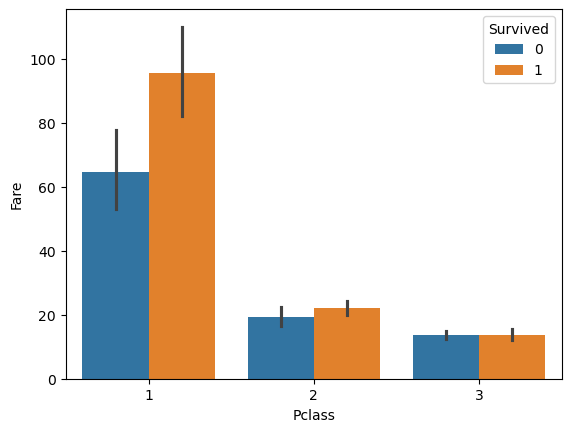

In [31]:
sns.barplot(data=train, x="Pclass", y="Fare", hue="Survived")

In [32]:
pd.pivot_table(train, index="Survived", values=["Age", "SibSp", "Parch", "Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


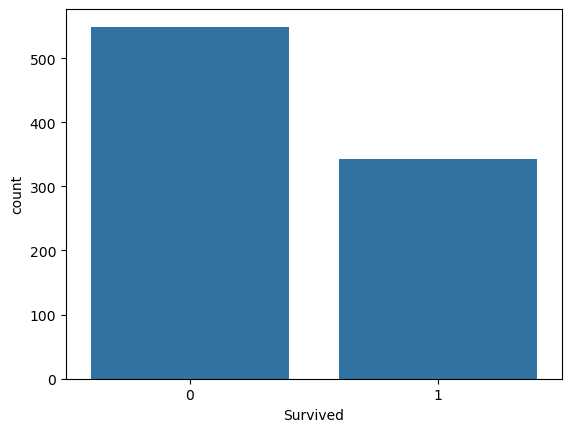

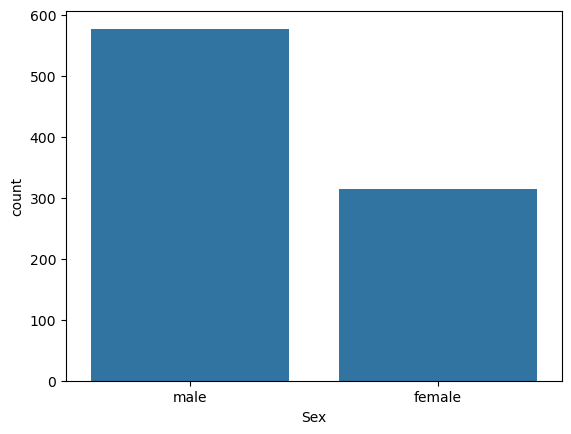

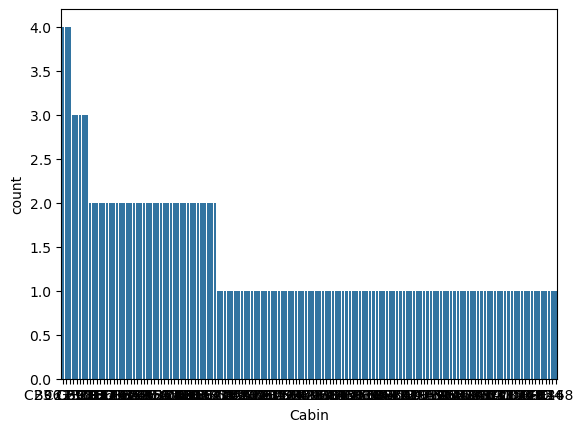

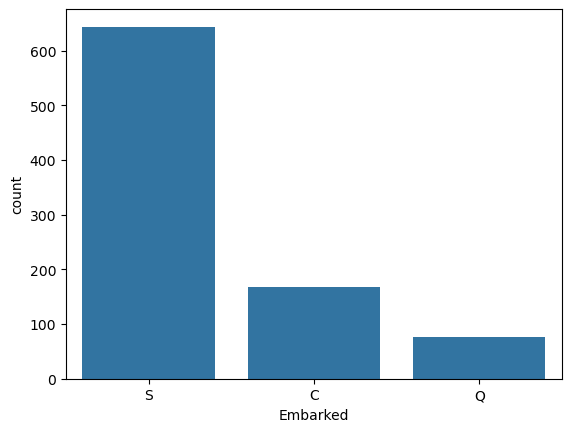

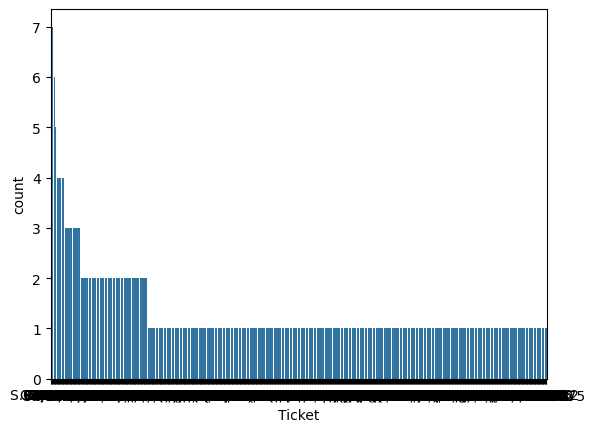

In [34]:
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts())
    plt.show()

In [93]:
x = pd.DataFrame(
    (
        pd.pivot_table(
            train,
            index="Survived",
            columns="Sex",
            values="Ticket",
            aggfunc="count",
        )
    )
)
print()
print(
    pd.pivot_table(
        train, index="Survived", columns="Pclass", values="Ticket", aggfunc="count"
    )
)
print()
print(
    pd.pivot_table(
        train,
        index="Survived",
        columns="Embarked",
        values="Ticket",
        aggfunc="count",
    )
)
print()
x


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



Sex,female,male
Survived,,
0,81,468
1,233,109


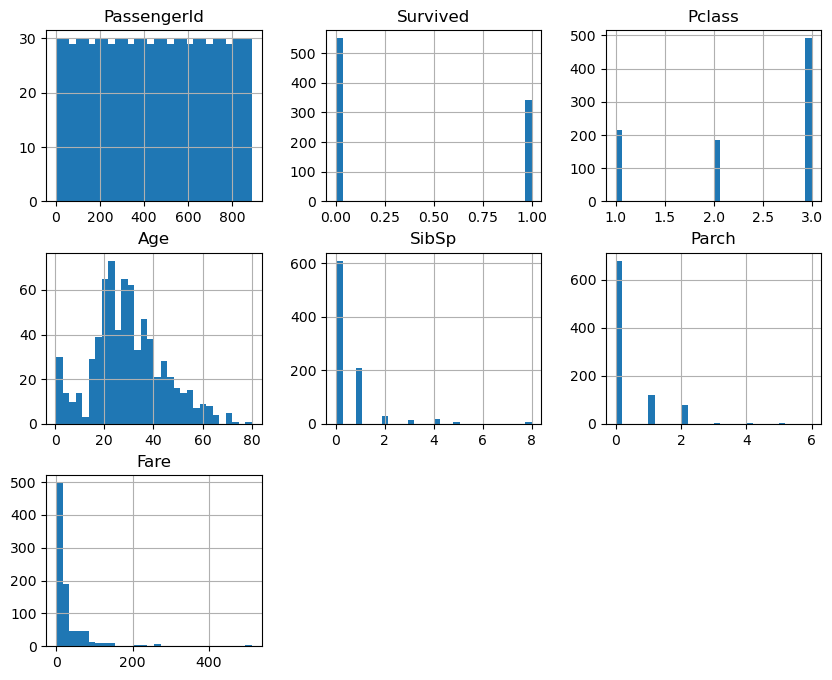

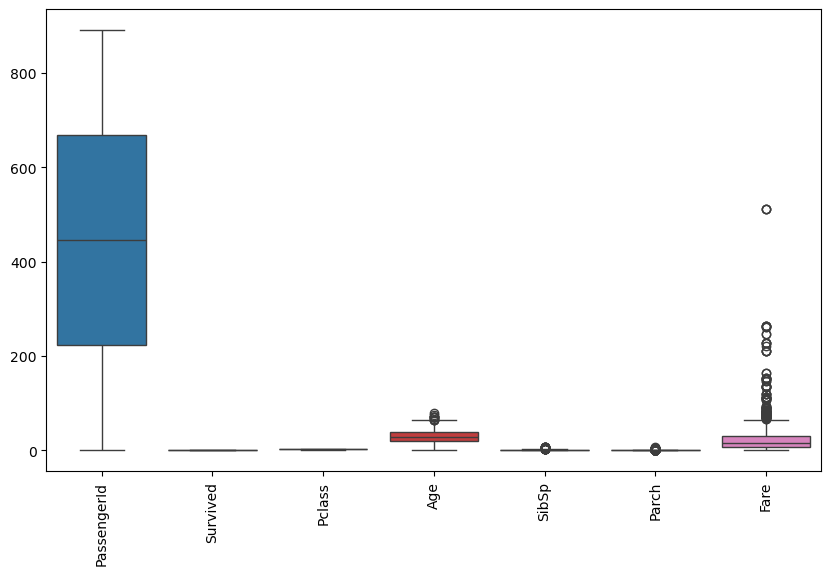

In [94]:
train.hist(bins = 30, figsize = (10,8))
plt.show()

plt.figure(figsize = (10, 6))
sns.boxplot(data = train)
plt.xticks(rotation = 90)
plt.show()

DATA CLEANING

In [95]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [96]:
train = train.drop(columns=["PassengerId", "Cabin", "Name", "Ticket"])

In [97]:
train["Age"] = train["Age"].fillna(train_data["Age"].mean())

In [98]:
train["Embarked"] = train["Embarked"].fillna(train_data["Embarked"].mode()[0])

In [99]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

FEATURE ENGINEERING

In [100]:
train["Fare"] = np.log(train["Fare"] + 1)

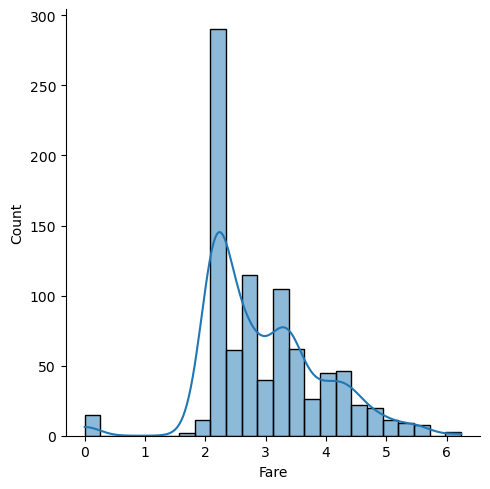

In [101]:
sns.displot(train["Fare"], kde=True)

<Axes: >

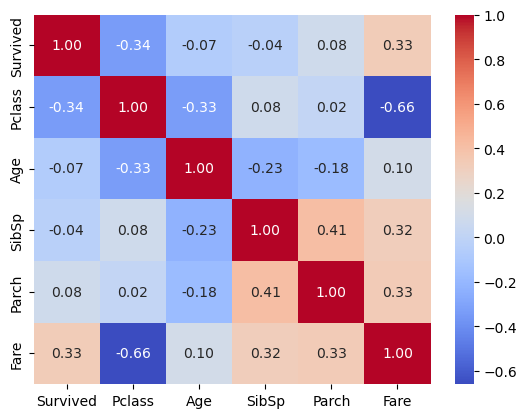

In [102]:
corr = train.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

In [114]:
X = train.drop(columns=["Survived"], axis=1)
y = train["Survived"]
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,2.110213,S
1,1,1,0,38.000000,1,0,4.280593,C
2,1,3,0,26.000000,0,0,2.188856,S
3,1,1,0,35.000000,1,0,3.990834,S
4,0,3,1,35.000000,0,0,2.202765,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,2.639057,S
887,1,1,0,19.000000,0,0,3.433987,S
888,0,3,0,29.699118,1,2,3.196630,S
889,1,1,1,26.000000,0,0,3.433987,C


DATA PREPROCESSING

In [30]:
X_test = test.drop(columns=["PassengerId", "Name", "Cabin", "Ticket"], axis=1)

X_test["Age"] = X_test["Age"].fillna(X_test["Age"].mean())
X_test["Fare"] = X_test["Fare"].fillna(X_test["Fare"].mean())

X_test.isnull().sum()

from sklearn.preprocessing import LabelEncoder

cols = ["Sex", "Embarked"]
le = LabelEncoder()

for col in cols:
    X_test[col] = le.fit_transform(X_test[col])

X_test.head()
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


ENCODE CATEGORICAL COLUMNS/DATA

In [149]:
train['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [150]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
2      2
Name: count, dtype: int64

In [152]:
train.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [8]:
X = train.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = train['Survived']

In [11]:
print(X)

     Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         3    male  22.0      1      0   7.2500   NaN        S
1         1  female  38.0      1      0  71.2833   C85        C
2         3  female  26.0      0      0   7.9250   NaN        S
3         1  female  35.0      1      0  53.1000  C123        S
4         3    male  35.0      0      0   8.0500   NaN        S
..      ...     ...   ...    ...    ...      ...   ...      ...
886       2    male  27.0      0      0  13.0000   NaN        S
887       1  female  19.0      0      0  30.0000   B42        S
888       3  female   NaN      1      2  23.4500   NaN        S
889       1    male  26.0      0      0  30.0000  C148        C
890       3    male  32.0      0      0   7.7500   NaN        Q

[891 rows x 8 columns]


In [12]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


SPLIT THE DATA INTO TEST AND TRAIN DATA

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [43]:
print(X.shape, X_train.shape,X_test.shape)

(891, 8) (712, 8) (179, 8)
